In [1]:
from scipy.io import loadmat

# Load the .mat file
file_path = '/content/Budget_TimeSeries.mat'
mat_data = loadmat(file_path)

mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'L', 'MBSL', 'MGRD', 'MIBE', 'MID', 'MRes', 'MVLM', 'Mds_upd', 'Mfil_upd', 'Mfilc', 'N', 't'])

In [2]:
# Msl_upd: Original deseasoned Mean Sea Level (MSL) records.
# Mfil_upd: Deseasoned MSL records, now with gaps filled.
# Mfilc: Deseasoned MSL records, now with gaps filled, and VLM (Vertical Land Motion) correction applied.
# MVLM: Barotropic coastal wind and inverse barometer effects.
# MBSL: Barotropic coastal wind and inverse barometer effects.
# MBE: Inverse barometer contribution.
# MGRD: Barycentric GRD.
# MIBE: Barycentric land motion correction (to be subtracted from Mfil_upd).
# MRes: Vertical land motion residual (Mfil_upd-MVLM-MGRD-MIBE).

# L: Contains location data in the format [Longitude, Latitude].
# MID: Represents the Permanent Service for Mean Sea Level (PSMSL) ID.
# N: Contains the station names.
# t: Represents time.

# Msl_upd:原始平均海平面(MSL)记录。
# Mfil_upd:旧的MSL记录，现在有空白填充。
# Mfilc:经过处理的MSL记录，现在填充了空白，并应用了VLM(垂直陆地运动)校正。
# MVLM:正压沿海风和逆气压计效应。
# MBSL:正压沿海风和逆气压计效应。沿海正压风和逆气压计效应
# MBE:逆气压计贡献。
# MGRD:质心GRD。
# MIBE:以重心为中心的陆地运动校正(从Mfil_upd中减去)。
# MRes:垂直陆地运动残差(Mfil_upd-MVLM-MGRD-MIBE)。

# L:包含[经度，纬度]格式的位置数据。
# MID:表示平均海平面永久服务(PSMSL) ID。
# N:包含站点名称。
# t:表示时间。

In [3]:
import pandas as pd

def convert_to_dataframe(mat_data, key):
    if mat_data[key].ndim == 2:
        return pd.DataFrame(mat_data[key], columns=[f"{key}_{i}" for i in range(mat_data[key].shape[1])])
    else:
        return pd.DataFrame(mat_data[key], columns=[key])

data_frames = {}

for key in ['L', 'MBSL', 'MGRD', 'MIBE', 'MID', 'MRes', 'MVLM', 'Mds_upd', 'Mfil_upd', 'Mfilc', 'N', 't']:
    try:
        data_frames[key] = convert_to_dataframe(mat_data, key)
    except Exception as e:
        print(f"Error converting {key}: {e}")

for key, df in data_frames.items():
    print(f"\nFirst few rows of the '{key}' DataFrame:")
    print(df.head())


First few rows of the 'L' DataFrame:
         L_0        L_1
0 -53.983333  47.300000
1 -59.133333  47.566667
2 -60.250000  46.216667
3 -62.700000  45.683333
4 -63.116667  46.233333

First few rows of the 'MBSL' DataFrame:
       MBSL_0     MBSL_1     MBSL_2      MBSL_3      MBSL_4     MBSL_5  \
0 -122.922944 -38.156119 -47.576809 -111.368331 -111.368331 -94.795159   
1 -133.028206 -42.515492 -46.704577  -69.918721  -69.918721 -77.975259   
2  -69.263509 -39.226805 -37.727422  -21.877312  -21.877312 -65.644249   
3    0.339878 -17.400753 -11.690788   28.543308   28.543308 -28.910255   
4   25.386330   4.492187   8.450649   39.442155   39.442155  13.838414   

       MBSL_6     MBSL_7     MBSL_8     MBSL_9  ...    MBSL_56    MBSL_57  \
0 -104.200515 -84.926395 -97.845041 -97.845041  ...   9.709007   6.429055   
1  -80.916920 -70.821937 -82.408064 -82.408064  ...  13.863706  12.784649   
2  -60.900418 -62.625535 -71.500046 -71.500046  ...   9.999974  22.152927   
3  -24.409340 -35.187264

In [4]:
# !pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"
!pip install basemap

In [5]:
from mpl_toolkits import basemap
print(basemap.__version__)

1.4.1


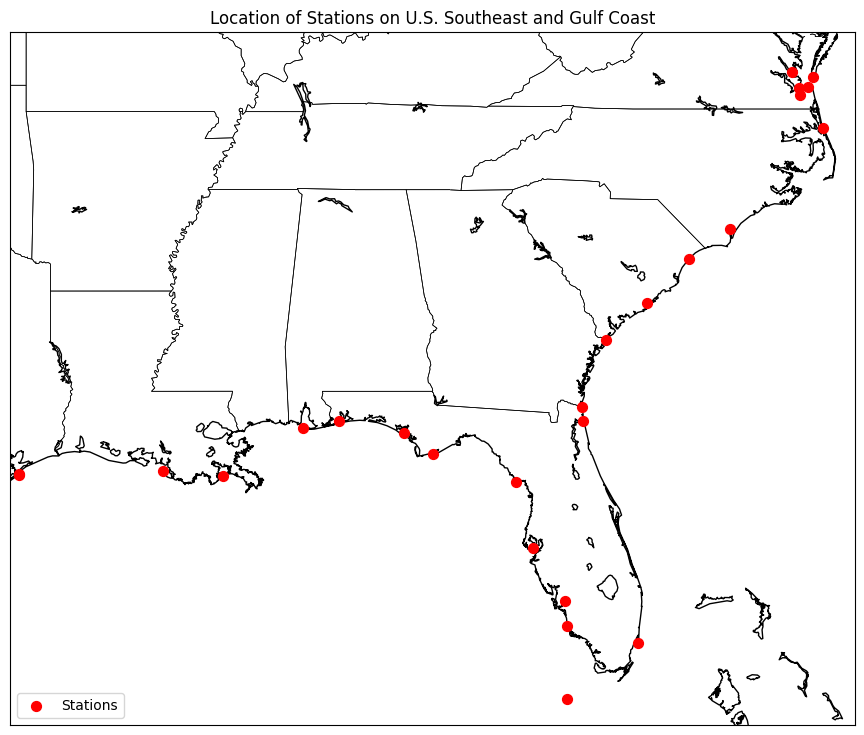

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

L_df = data_frames['L']
L_df.columns = ['Longitude', 'Latitude']
plt.figure(figsize=(12, 9))

m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=38, llcrnrlon=-95, urcrnrlon=-75, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(L_df['Longitude'].values, L_df['Latitude'].values)

m.scatter(x, y, s=50, c='red', marker='o', label='Stations', zorder=5)

plt.title('Location of Stations on U.S. Southeast and Gulf Coast')
plt.legend(loc='lower left')
plt.show()



<ipython-input-11-8896d5728b38>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m.scatter(x, y, s=50, c=colors, cmap='viridis', edgecolor='k', zorder=5)
<ipython-input-11-8896d5728b38>:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Average MGRD Value')


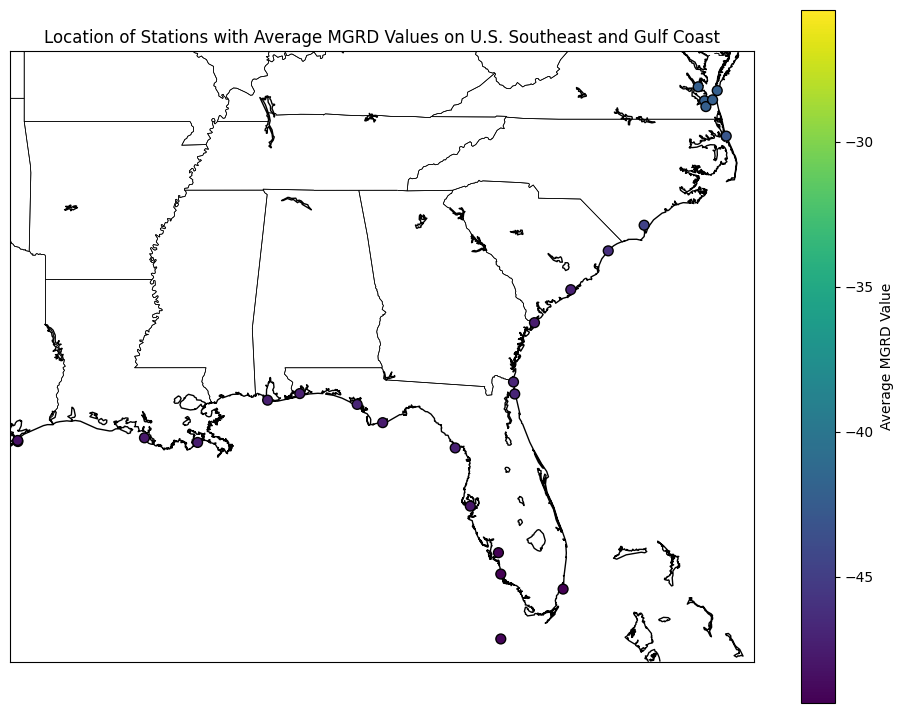

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

MGRD_avg = np.mean(mat_data['MGRD'], axis=0)

# Basemap
plt.figure(figsize=(12, 9))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=38, llcrnrlon=-95, urcrnrlon=-75, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

L_df = pd.DataFrame(mat_data['L'], columns=['Longitude', 'Latitude'])
x, y = m(L_df['Longitude'].values, L_df['Latitude'].values)

norm = plt.Normalize(MGRD_avg.min(), MGRD_avg.max())
colors = plt.cm.viridis(norm(MGRD_avg))

m.scatter(x, y, s=50, c=colors, cmap='viridis', edgecolor='k', zorder=5)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Average MGRD Value')

plt.title('Location of Stations with Average MGRD Values on U.S. Southeast and Gulf Coast')

plt.show()


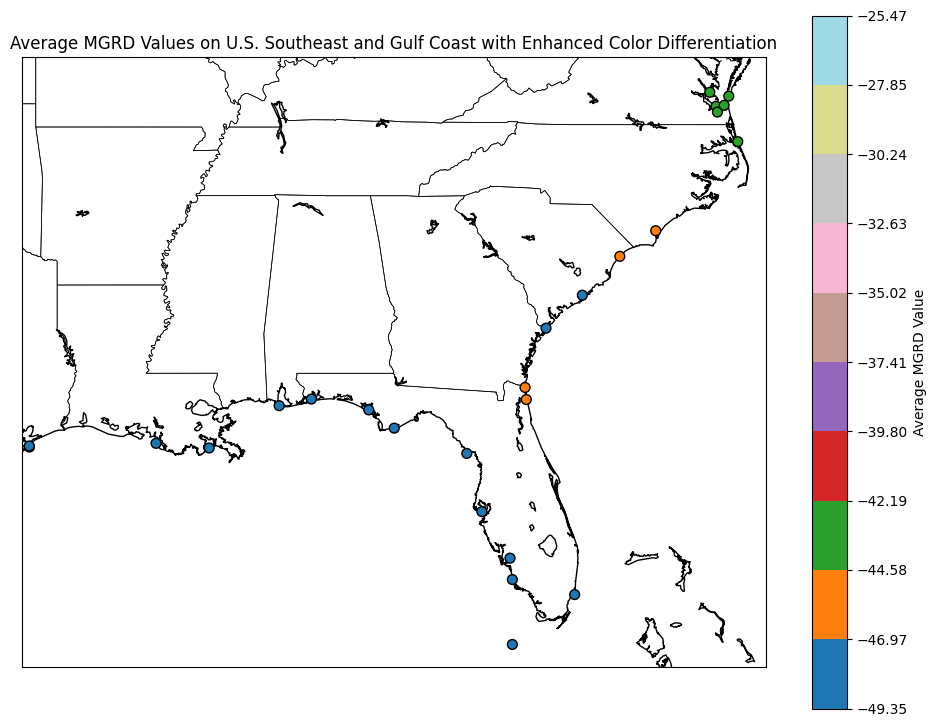

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

L_df = pd.DataFrame(mat_data['L'], columns=['Longitude', 'Latitude'])

# Average MGRD
MGRD_avg = np.mean(mat_data['MGRD'], axis=0)

# Set up Basemap for the U.S. Southeast and Gulf Coast
plt.figure(figsize=(12, 9))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=38, llcrnrlon=-95, urcrnrlon=-75, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(L_df['Longitude'].values, L_df['Latitude'].values)

norm = plt.Normalize(MGRD_avg.min(), MGRD_avg.max())
n_bins = 10
cmap = plt.get_cmap('tab20', n_bins)

scatter = m.scatter(x, y, c=MGRD_avg, s=50, cmap=cmap, norm=norm, edgecolor='k', zorder=5)

cbar = plt.colorbar(scatter, ticks=np.linspace(MGRD_avg.min(), MGRD_avg.max(), n_bins + 1))
cbar.set_label('Average MGRD Value')

plt.title('Average MGRD Values on U.S. Southeast and Gulf Coast with Enhanced Color Differentiation')
plt.show()



In [20]:
pip install adjustText

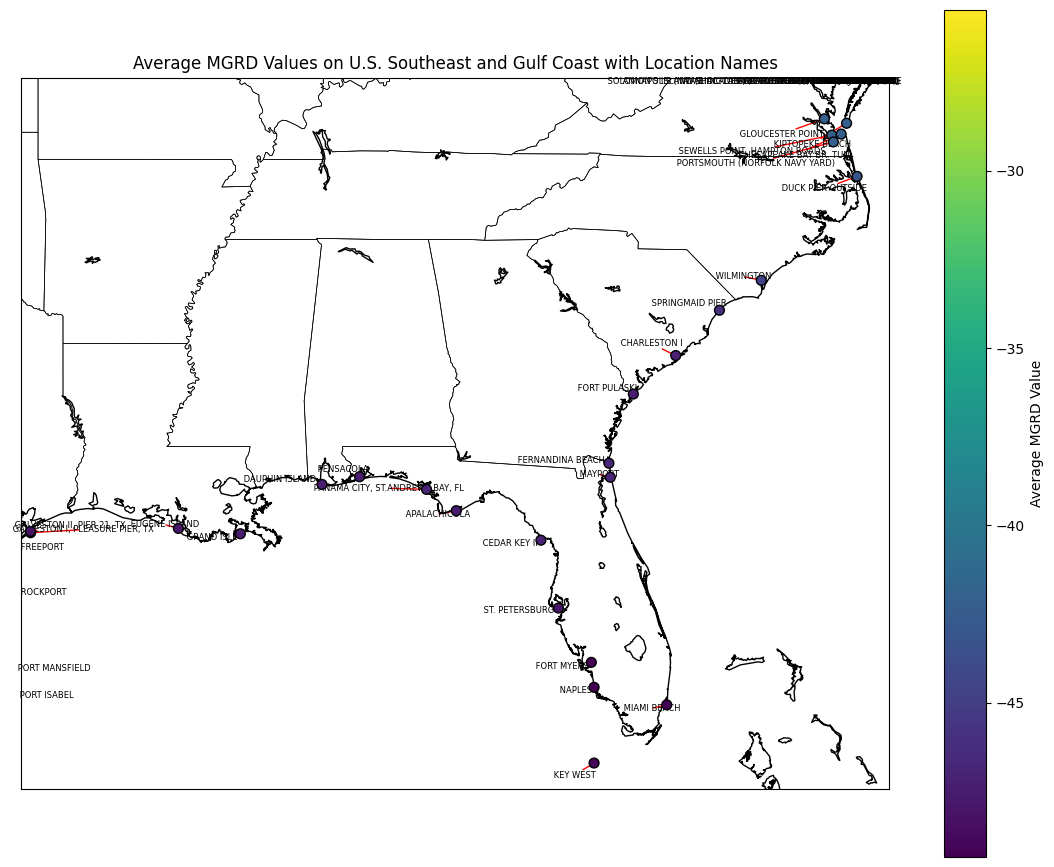

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd


L_df = pd.DataFrame(mat_data['L'], columns=['Longitude', 'Latitude'])

location_names = [name[0] for name in mat_data['N'].flatten()]

MGRD_avg = np.mean(mat_data['MGRD'], axis=0)

plt.figure(figsize=(14, 11))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=38, llcrnrlon=-95, urcrnrlon=-75, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

x, y = m(L_df['Longitude'].values, L_df['Latitude'].values)

scatter = m.scatter(x, y, c=MGRD_avg, s=50, cmap='viridis', norm=norm, edgecolor='k', zorder=5)

from adjustText import adjust_text
texts = []
for i, name in enumerate(location_names):
    texts.append(plt.text(x[i], y[i], ' ' + name, fontsize=6, ha='right', va='center', color='black'))

adjust_text(texts, x=x, y=y, arrowprops=dict(arrowstyle='->', color='red'))

plt.colorbar(scatter, label='Average MGRD Value')
plt.title('Average MGRD Values on U.S. Southeast and Gulf Coast with Location Names')
plt.show()
